In [622]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [623]:
df_red = pd.DataFrame({'width':[0.3, 0.9, 0.2, 0.4, 0.6],
                        'length':[0.7, 0.2, 0.5, 0.2, 0.3],
                        'color':['red'] * 5})
df_purple = pd.DataFrame({'width':[1.0, 0.8, 1.2, 0.6, 1.3],
                        'length':[0.9, 0.6, 0.5, 0.8, 0.7],
                        'color':['purple'] * 5})
df = pd.concat((df_red, df_purple))

In [624]:
df['width'] = df['width'] * 1
df['width'] = df['width'] - df['width'].mean()
df['length'] = df['length'] * -1
df['length'] = df['length'] - df['length'].mean()


In [625]:
df

,color,length,width
0,red,-0.16,-0.43
1,red,0.34,0.17
2,red,0.04,-0.53
3,red,0.34,-0.33
4,red,0.24,-0.13
0,purple,-0.36,0.27
1,purple,-0.06,0.07
2,purple,0.04,0.47
3,purple,-0.26,-0.13
4,purple,-0.16,0.57


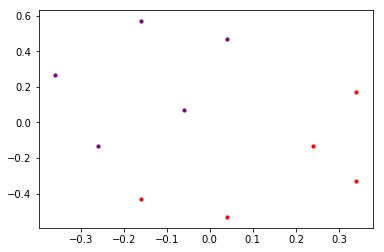

In [626]:
plt.scatter(df[df['color'] == 'red']['length'],
            df[df['color'] == 'red']['width'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['length'],
            df[df['color'] == 'purple']['width'],
            color='purple', s=10)
plt.show()

In [627]:
color = df['color'].unique()
# y = df.values[:, 0]
y =  np.array(list(map(lambda x: 0 if x == 'red' else 1,
                        df.values[:, 0])))   
x = df.values[:, 1:].astype(np.float32)
bias = np.ones((df.shape[0], 1))
x = np.concatenate((x, bias), 1)

In [628]:
def softmax(predict):
    # softm = np.exp(predict) / np.sum(np.exp(predict))
    softmax = np.power(np.e, predict) / np.sum(np.power(np.e, predict))
    return softmax

def sigmoid(predict):
    # sigmoid = 1 / (1 + np.power(np.e, -predict))
    sigmoid = 1 / (1 + np.exp(-predict))
    return sigmoid

# def log_loss(y, predict):
#     log_loss = -np.sum(y * np.log(predict) +
#                         (1 - y) * np.log(1 - predict)) / y.size
#     return loss_log

def loss_log(y, predict):
    loss_log = -np.mean(y * np.log(predict) +
                        (1 - y) * np.log(1 - predict))
    return loss_log

In [629]:
weight = np.random.random(x.shape[1])

delta = np.zeros(weight.size, np.float32)
alpha = np.array([0.1] * weight.size, np.float32)

epochs = 100
error = np.zeros(epochs, np.float64)
for j in range(epochs):
    predict = sigmoid(x @ weight)
    error[j] = loss_log(y, predict)
    for i in range(x.shape[0]):
        predict = sigmoid(x[i] @ weight)
        # delta = delta + (predict - y[i]) * x[i]
        delta += (predict - y[i]) * x[i]

    weight = weight - (delta * alpha)

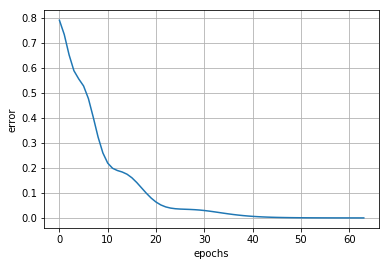

In [630]:

plt.plot(range(epochs), error)
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid()
plt.show()

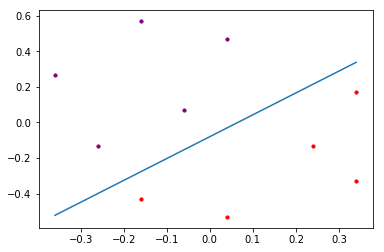

In [631]:
plt.scatter(df[df['color'] == 'red']['length'],
            df[df['color'] == 'red']['width'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['length'],
            df[df['color'] == 'purple']['width'],
            color='purple', s=10)

# divider_x = np.array([x[:, 0].min(), x[:, 0].max()])
divider_x = np.array([df['length'].min(), df['length'].max()])
# divider_x = np.array([df['width']])
# # line_y = (-divider_x * weight[0] - weight[2]) / weight[1]
divider_y = -(divider_x * weight[0] + weight[2]) / weight[1]
# # divider_y
plt.plot(divider_x, divider_y)
plt.show()